In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from functools import reduce
from tkinter import *
from tkcalendar import Calendar
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('data.csv', index_col=0).T.cumsum(axis = 0)

In [3]:
y = df.iloc[:,4].dropna()
x = pd.Series(np.arange(1,len(y)+1,1))

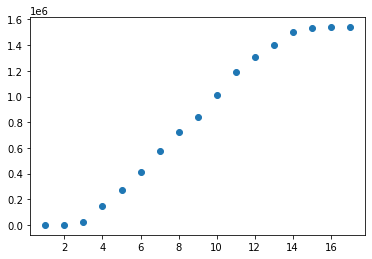

In [4]:
plt.scatter(x, y)
plt.show()

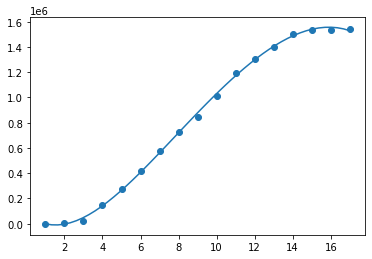

In [5]:
mymodel = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 50)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [6]:
w = []

for i in myline:
    w.append(mymodel(i))

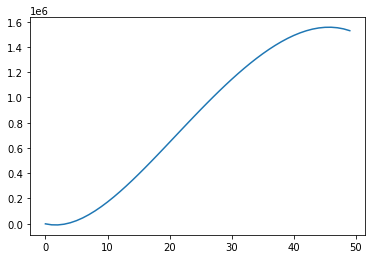

In [7]:
plt.plot(w)

In [8]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, x, y,p0, method='dogbox', bounds = ((0,np.inf)))


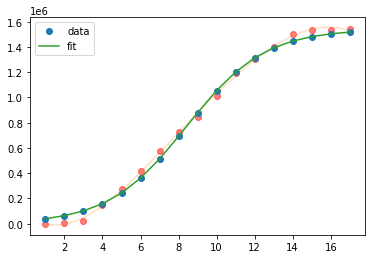

In [9]:
z = sigmoid(x, *popt)

plt.plot(x, z, 'o', label='data')
plt.scatter(x, y, color = 'red', alpha = 0.5)
plt.plot(myline, mymodel(myline), alpha = 0.25)
plt.plot(x,z, label='fit')
plt.legend(loc='best')

In [10]:
v = np.linspace(1, len(y), 100)

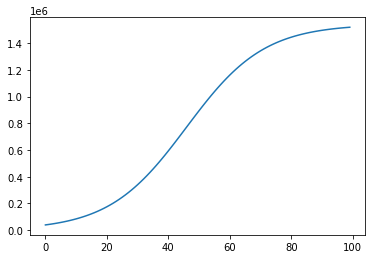

In [11]:
fit = []
for i in v:
    fit.append(sigmoid(i,*popt))
    
plt.plot(fit)

In [12]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [13]:
g = NormalizeData(fit)

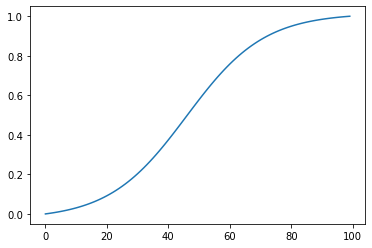

In [14]:
plt.plot(g)

In [15]:
dy = pd.DataFrame(g, columns = ['Project X'])

In [16]:
def plop(x):
    y = df.iloc[:,x].dropna()
    x = pd.Series(np.arange(1,len(y)+1,1))
    def sigmoid(x, L ,x0, k, b):
        y = L / (1 + np.exp(-k*(x-x0)))+b
        return (y)
    p0 = [max(y), np.median(x),1,min(y)]
    popt, pcov = curve_fit(sigmoid, x, y,p0, method='dogbox', bounds = ((0,np.inf)))
    fit = []
    for i in v:
        fit.append(sigmoid(i,*popt))
    def NormalizeData(data):
        return (data - np.min(data)) / (np.max(data) - np.min(data))
    g = NormalizeData(fit)
    return(pd.DataFrame(g))

In [17]:
def create_df():
    c = []
    for i in np.arange(0,len(df.columns)):
        c.append(plop(i))
    dff = pd.concat(c, axis = 1)
    dff.columns = df.columns
    return(dff.round(decimals = 6))

In [18]:
new_df = create_df()
new_df

Name,Project X,Project Y,Project L,Project P,Project C
0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.004422,0.000280,0.000059,0.0,0.002145
2,0.009539,0.000612,0.000128,0.0,0.004456
3,0.015451,0.001005,0.000209,0.0,0.006946
4,0.022267,0.001471,0.000305,0.0,0.009628
...,...,...,...,...,...
95,0.999993,0.999970,0.999695,1.0,0.994421
96,0.999995,0.999980,0.999791,1.0,0.995979
97,0.999997,0.999988,0.999872,1.0,0.997423
98,0.999999,0.999994,0.999941,1.0,0.998761


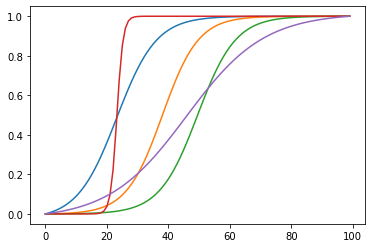

In [19]:
plt.plot(create_df())

In [20]:
def graph():
    g = new_df[[project.get()]]*int(cv.get())
    start = pd.to_datetime(cal.get_date())
    duration = int(dur.get())
    end = start + timedelta(weeks = duration*4.345)
    dates = np.asarray(pd.to_datetime(np.linspace(start.value,end.value,100)))
    v = g.set_index(dates)
    plt.plot(v, color = 'black')
    plt.show()

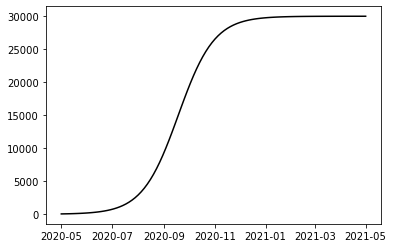

In [25]:
window = Tk()
window.title('Cost Curve Program')
window.configure(background = 'black')
window.geometry('1000x700')

Label (window, text = 'Select a historical project:', bg = 'black', fg = 'white', font = 'none 12 bold').grid(row = 1, column = 0, sticky = W)

options = new_df.columns.values.tolist()
project = StringVar(window)
project.set(options[0]) # default value
selector = OptionMenu(window, project, *options)
selector.grid(row = 4, column = 3, padx = 20, pady = 40)

cv = Entry(window)
cv.grid(row = 4, column = 0, pady = 20, padx = 10)
cvlab = Label(window, text = 'Contract Value')
cvlab.grid(row = 3, column = 0, pady = 5, padx = 10)

dur = Entry(window)
dur.grid(row = 4, column = 1, pady = 20, padx = 10)
durlab = Label(window, text = 'Month Duration')
durlab.grid(row = 3, column = 1, pady = 5, padx = 10)

cal = Calendar(window, selectmode = 'day',
               year = 2020, month = 5,
               day = 22)
cal.grid(row = 4, column = 4, pady = 20, padx = 10)
callab = Label(window, text = 'Start Date')
callab.grid(row = 2, column = 4, pady = 5, padx = 10)
    
my_button = Button(window, text = 'Submit', command = graph)
my_button.grid(row = 5, column = 2)

window.mainloop()


In [26]:
g = new_df[['Project L']]*int(1000000)
start = pd.to_datetime('1-1-2020')
duration = 12
end = start + timedelta(weeks = duration*4.345)
dates = np.asarray(pd.to_datetime(np.linspace(start.value,end.value,100)))
v = g.set_index(dates)

In [31]:
start = pd.to_datetime('1-1-2020')
end = start + timedelta(weeks = 12*4.345)

In [32]:
start-end

Timedelta('-365 days +00:28:48')

In [33]:
dates

array(['2020-01-01T00:00:00.000000000', '2020-01-04T16:28:48.000000000',
       '2020-01-08T08:57:36.000000000', '2020-01-12T01:26:24.000000000',
       '2020-01-15T17:55:12.000000000', '2020-01-19T10:24:00.000000000',
       '2020-01-23T02:52:48.000000000', '2020-01-26T19:21:36.000000000',
       '2020-01-30T11:50:24.000000000', '2020-02-03T04:19:12.000000000',
       '2020-02-06T20:48:00.000000000', '2020-02-10T13:16:48.000000000',
       '2020-02-14T05:45:36.000000000', '2020-02-17T22:14:24.000000000',
       '2020-02-21T14:43:12.000000000', '2020-02-25T07:12:00.000000000',
       '2020-02-28T23:40:48.000000000', '2020-03-03T16:09:36.000000000',
       '2020-03-07T08:38:24.000000000', '2020-03-11T01:07:12.000000000',
       '2020-03-14T17:36:00.000000000', '2020-03-18T10:04:48.000000000',
       '2020-03-22T02:33:36.000000000', '2020-03-25T19:02:24.000000000',
       '2020-03-29T11:31:12.000000000', '2020-04-02T04:00:00.000000000',
       '2020-04-05T20:28:48.000000000', '2020-04-09

In [38]:
ploop = new_df.copy().set_index(dates)

In [39]:
ploop

Name,Project X,Project Y,Project L,Project P,Project C
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.0,0.000000
2020-01-04 16:28:48,0.004422,0.000280,0.000059,0.0,0.002145
2020-01-08 08:57:36,0.009539,0.000612,0.000128,0.0,0.004456
2020-01-12 01:26:24,0.015451,0.001005,0.000209,0.0,0.006946
2020-01-15 17:55:12,0.022267,0.001471,0.000305,0.0,0.009628
...,...,...,...,...,...
2020-12-16 05:36:00,0.999993,0.999970,0.999695,1.0,0.994421
2020-12-19 22:04:48,0.999995,0.999980,0.999791,1.0,0.995979
2020-12-23 14:33:36,0.999997,0.999988,0.999872,1.0,0.997423
2020-12-27 07:02:24,0.999999,0.999994,0.999941,1.0,0.998761
